In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
import seaborn as sns

In [2]:
data =pd.read_csv('Realestatevaluationdatset.csv')

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
#quitar la fecha y No

data2=data.drop(['No', 'X1 transaction date'], axis=1)
data2

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
# renombrar columnas 
data2.columns=['house age', ' distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area' ]

In [7]:
data2.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
data2.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      house age   distance to the nearest MRT station  \
0        False                                 False   
1        False                                 False   
2        False                                 False   
3        False                                 False   
4        False                                 False   
..         ...                                   ...   
409      False                                 False   
410      False                                 False   
411      False                                 False   
412      False                                 False   
413      False                                 False   

     number of convenience stores  latitude  longitude  \
0                           False     False      False   
1                           False     False      False   
2                           False     False      False   
3                           False

<AxesSubplot: >

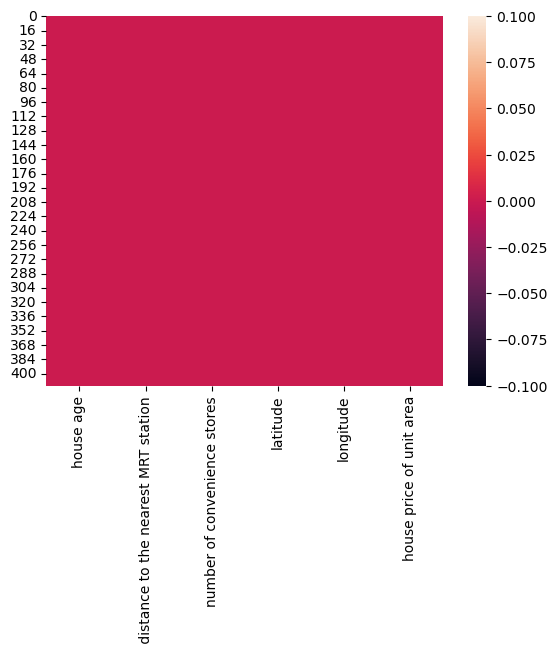

In [9]:
sns.heatmap(data2.isnull())

In [10]:
X=data2.drop('house price of unit area', axis=1)
Y=data2['house price of unit area']

In [11]:
x_train,  x_test, y_train, y_test=train_test_split(X, Y, random_state=1, test_size=0.25)

In [12]:
model=XGBRegressor(n_estimators =1000, learning_rate=0.3)


In [13]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

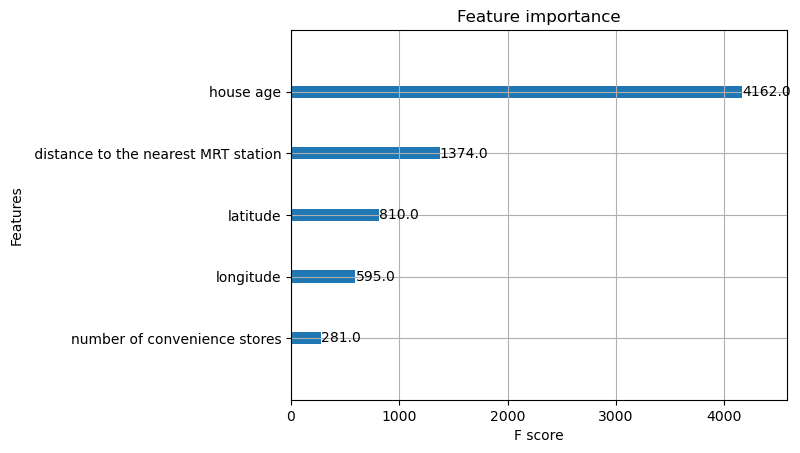

In [14]:
import matplotlib.pyplot as plt
# la varable edad de la casa e sla variable con mas importancia la edad la casa
#menos  importancia el numero de convenience stores

# estos parametros pueden  cambiar si cambian los parametros de las caracteristicas 
# hiperparametrosdel modelo learning_rate por ejemplo
xgb.plot_importance(model, ax=plt.gca())

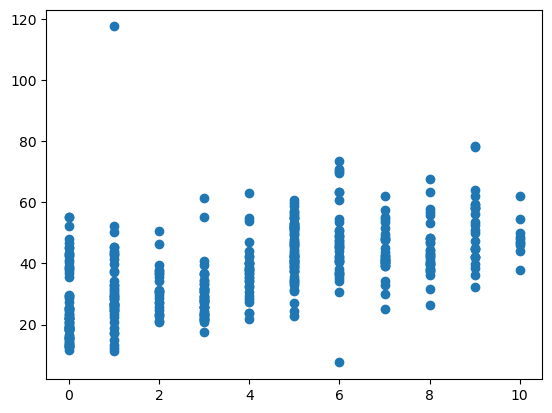

In [15]:
plt.scatter(data2['number of convenience stores'], data2['house price of unit area'])

In [16]:
predictions=model.predict(x_test)

In [17]:
predictions[1:10]

array([47.567715, 26.35967 , 12.899986, 94.192535, 30.500566, 27.26158 ,
       34.42324 , 42.406124, 13.958535], dtype=float32)

## DESEMpeño del modelo

In [18]:
pred_train=model.predict(x_train)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print('r2 cuanta varianza puede explicar ',r2_score(y_train, pred_train))#
##

r2 cuanta varianza puede explicar  0.9917739648973071


In [20]:
print('Error cuadratico medio', mean_squared_error(y_train, pred_train))
#para saber si e suna buena metrica toca comparlo con otro modlo 

Error cuadratico medio 1.5346697517409618


In [21]:
model.score(x_test, y_test)
# el modelo slo explica el 0.36 de lsodatos d eprueba  

0.36687413292592996

## una sobreajuste dado que el data de entranmiento esta muy bien ajustado pero el texto no lo está haciendolo bien 

In [22]:
print(mean_squared_error(y_test, predictions))

111.79030147798011


## MEJORAR MODELO 
1. Remover oultiers
2. adicionar la fecha 
3. cambiar  trin test  test size =0.33
4. optimizar hyperparametros
5. correr una validacion cruzada 

In [23]:
data1=data.drop(['No'], axis=1)
data1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [24]:
# renombrar columnas 
data1.columns=['Date','house age', ' distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area' ]

In [25]:
type(data1.Date[0])

numpy.float64

In [26]:
from datetime import datetime
data1['data_time']=pd.to_datetime(data1['Date'], format='%Y')
data1['year']=pd.DatetimeIndex(data1['data_time']).year

In [27]:
data1.head()

,Date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,data_time,year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012


In [28]:
import math
data1['month'], data1['year2']=data1['Date'].apply(lambda x: math.modf(x)).str

C:\Users\daalu\AppData\Local\Temp\ipykernel_8264\777193806.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['month'], data1['year2']=data1['Date'].apply(lambda x: math.modf(x)).str


In [29]:
data1.head()

,Date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,data_time,year,month,year2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,0.917,2012.0
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,0.917,2012.0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,0.583,2013.0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,0.500,2013.0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,0.833,2012.0


In [30]:
data1['year2']=(data1['year2']).astype(int)

In [31]:
data1['month']=data1['month']*12


In [32]:
data1.head()

,Date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,data_time,year,month,year2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.004,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.004,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.996,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.000,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.996,2012


In [33]:
data1['day'], data1['month']=data1['month'].apply(lambda x: math.modf(x)).str

C:\Users\daalu\AppData\Local\Temp\ipykernel_8264\3661073167.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['day'], data1['month']=data1['month'].apply(lambda x: math.modf(x)).str


In [34]:
data1.head()

,Date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,data_time,year,month,year2,day
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.0,2012,0.004
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.0,2012,0.004
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.0,2013,0.996
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.0,2013,0.000
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.0,2012,0.996


In [35]:
data1['month']=(data1['month']).astype(int)
data1['day']=(data1['day']*30+1).astype(int)

In [36]:
data1.head()

,Date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,data_time,year,month,year2,day
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11,2012,1
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11,2012,1
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6,2013,30
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6,2013,1
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9,2012,30


In [37]:
data1=data1.drop(['Date', 'data_time', 'year2'],axis=1)


In [38]:
data1

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,0,1
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,8,1
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,3,1
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,0,1


## OUTLIERS

<AxesSubplot: >

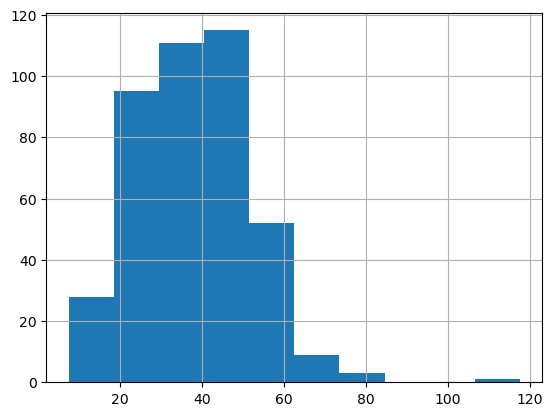

In [39]:
data1['house price of unit area'].hist()

#los datos poe enica de 100 son chao 

In [40]:
data1=data1[data1['house price of unit area']<90]


<AxesSubplot: xlabel='house price of unit area', ylabel='Count'>

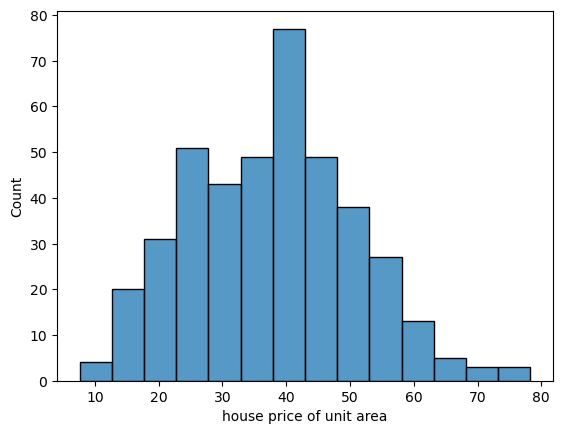

In [41]:
sns.histplot(data1['house price of unit area'])

In [42]:
X=data1.drop('house price of unit area', axis=1)
Y=data1['house price of unit area']


In [43]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, random_state=1)

In [44]:
model2=XGBRegressor()


In [45]:
x_train.shape, x_test.shape

((309, 8), (104, 8))

In [46]:
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

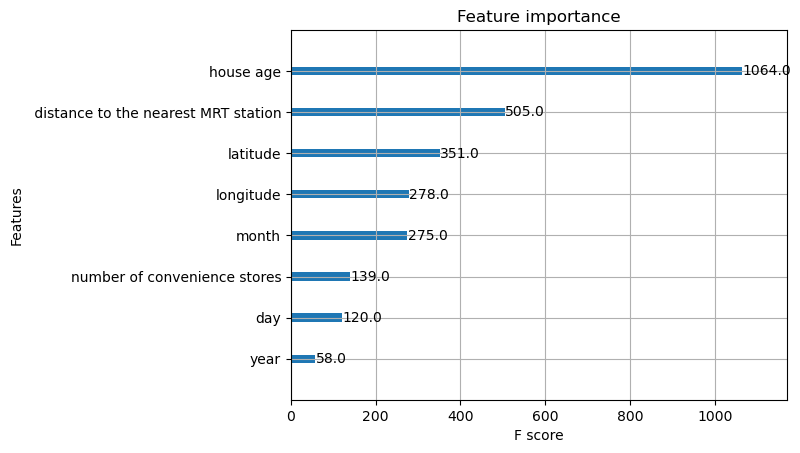

In [47]:
xgb.plot_importance(model2, ax=plt.gca())

In [48]:
pred_train =model2.predict(x_train)
predicion=model2.predict(x_test)

In [49]:
print(r2_score(y_train, pred_train))

0.9967961938408723


In [50]:
print(r2_score(y_test,predicion ))

0.7417750995831265


In [51]:
print(mean_squared_error(y_train, pred_train))

0.5431973352504631


In [52]:
print(mean_squared_error(y_test, predicion))

44.028456871771695


## Escoger hyperparametros 

usaremso e modelo 2 

para XGBRegresor  los usuales son 
1. n_estimators=20 50 ....
2. learning_rate
3. max_dept
4. min_child_weigt =define el peso minimo para requerir una vueva division el rederminado es 1 
5.  subsamples 

6. gamma la perdida si no hay una perdida minima 

In [53]:
from sklearn.model_selection import GridSearchCV

xgbr= XGBRegressor(gpu_id=0, learning_rate=0.3, max_depth=6, n_estimators=100,
                  subsample=0.8)

tuned_parameters={
    'max_depth':[3,4,5,6],
    'min_child_weight':[1,2,3,4,5,6],
    'gamma':[i/10.0 for i in range(0,5)],
    'learning_rate':[0.01, 0.05, 0.1, 0.2] # 100, 500, 1000, 2000
}

clf=GridSearchCV(xgbr, param_grid=tuned_parameters,cv=5) #cv es validacion cruzada



In [54]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.3, max_b...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4, 5, 6]})

In [55]:
print('mejores paramentros de entreamiento s')
print(clf.best_params_)

mejores paramentros de entreamiento s
{'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3}


In [56]:
print('best scoree found on developement set:')
print(clf.best_score_)

best scoree found on developement set:
0.7407440403453803


In [57]:
xgbr.objective

'reg:squarederror'

In [58]:


model3=XGBRegressor(gpu_id=0, learning_rate=0.05, max_depth=3, n_estimators=100,
                  subsample=0.8, gamma= 0.1, min_child_weight= 3)

In [59]:
model3.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

xgb.plot_importance(model3, ax=plt.gca())

In [60]:
pred_train =model3.predict(x_train)
predicion=model3.predict(x_test)

In [61]:
print(r2_score(y_train, pred_train))
print(r2_score(y_test,predicion ))

0.8866766297596369
0.7925611260936312


In [62]:
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, predicion))

19.213694486724307
35.36922077836396


## Mejoras finales del modelo 

In [63]:
data1.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30


In [64]:
corr=data1.corr()
corr

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month,day
house age,1.000000,0.024676,0.048131,0.055119,-0.048822,-0.210985,0.050193,-0.065570,0.026322
distance to the nearest MRT station,0.024676,1.000000,-0.605328,-0.590805,-0.807079,-0.694009,0.017593,0.039912,-0.055431
number of convenience stores,0.048131,-0.605328,1.000000,0.445994,0.449239,0.612635,-0.003909,0.021271,-0.030288
latitude,0.055119,-0.590805,0.445994,1.000000,0.413249,0.563954,0.007404,0.017766,0.029698
longitude,-0.048822,-0.807079,0.449239,0.413249,1.000000,0.549250,0.013488,-0.066000,0.034311
house price of unit area,-0.210985,-0.694009,0.612635,0.563954,0.549250,1.000000,0.075405,-0.047523,0.052549
year,0.050193,0.017593,-0.003909,0.007404,0.013488,0.075405,1.000000,-0.810458,0.091546
month,-0.065570,0.039912,0.021271,0.017766,-0.066000,-0.047523,-0.810458,1.000000,-0.236143
day,0.026322,-0.055431,-0.030288,0.029698,0.034311,0.052549,0.091546,-0.236143,1.000000


<AxesSubplot: >

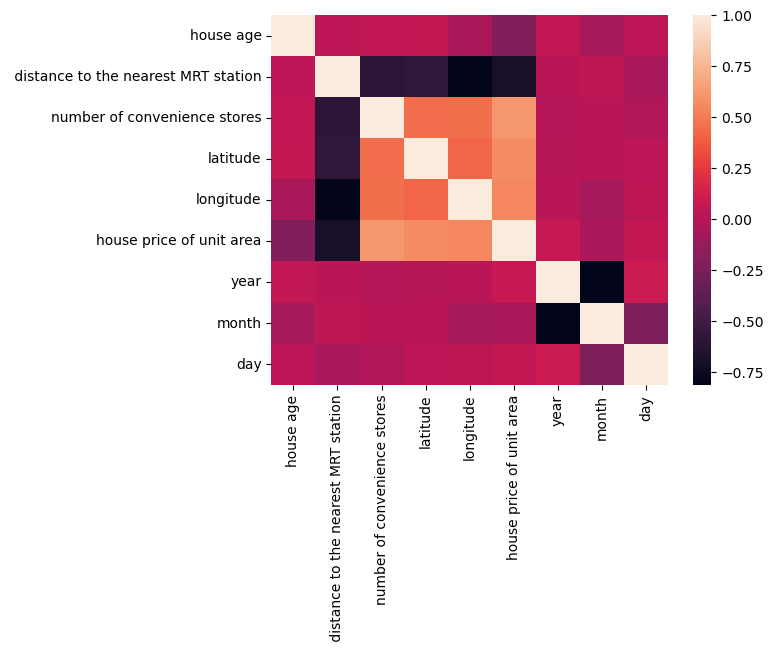

In [65]:
sns.heatmap(corr)

In [66]:
pd.crosstab(data1['year'], columns='count')

col_0,count
year,
2012,126
2013,287


In [67]:
data1.groupby('year')['house price of unit area'].mean()

# aumenta la media de los preicon 

year
2012    36.304762
2013    38.438676
Name: house price of unit area, dtype: float64

In [68]:
data1.groupby('year')['house price of unit area'].std()

year
2012    12.484915
2013    13.253819
Name: house price of unit area, dtype: float64

In [69]:
data1.groupby('month')['house price of unit area'].mean()

month
0     36.922973
2     38.304000
3     40.153333
5     38.453448
6     38.607143
8     38.543333
9     35.636207
11    35.557895
Name: house price of unit area, dtype: float64

In [70]:
# Añadiremos na constate  los datos la constante es un coeficiente independiente 

import statsmodels.api as sm

x_constant =sm.add_constant(X)

lin_reg=sm.OLS(Y, x_constant).fit()# OLS la medida los refgrsio
print('0.63 varinaza del problema ')
print('longitud  no es significativa ')
print('año si es significativa mes no ')
print(' En el  modelo de XGBR  en el plot d eipimportance  la viariable month si es importnate y año no lo es')
print('conclusion quitar año, día, y longitud ver el modelo arriba  ')
lin_reg.summary()

0.63 varinaza del problema 
longitud  no es significativa 
año si es significativa mes no 
 En el  modelo de XGBR  en el plot d eipimportance  la viariable month si es importnate y año no lo es
conclusion quitar año, día, y longitud ver el modelo arriba  


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house price of unit area   R-squared:                       0.628
Model:                                  OLS   Adj. R-squared:                  0.621
Method:                       Least Squares   F-statistic:                     85.36
Date:                      Wed, 05 Apr 2023   Prob (F-statistic):           5.37e-82
Time:                              13:57:04   Log-Likelihood:                -1441.9
No. Observations:                       413   AIC:                             2902.
Df Residuals:                           404   BIC:                             2938.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1.603e+04   6270.120     -2.556      0.011   -2.84e+04   -3699.960
house age                               -0.2640      0.035     -7.528      0.000      -0.333      -0.195
 distance to the nearest MRT station    -0.0038      0.001     -5.833      0.000      -0.005      -0.003
number of convenience stores             1.3095      0.172      7.599      0.000       0.971       1.648
latitude                               225.0145     40.538      5.551      0.000     145.323     304.706
longitude                               15.9548     44.223      0.361      0.718     -70.982     102.892
year                                     4.2272      1.507      2.806      0.005       1.265       7.189
month                                    0.2815      0.206      1.366      0.173      -0.124       0.687
day                                      0.0427      0.031      1.383      0.167      -0.018       0.103
==============================================================================
Omnibus:                       60.884   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.239
Skew:                           0.718   Prob(JB):                     2.64e-35
Kurtosis:                       5.682   Cond. No.                     3.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'slecion de vatiables')

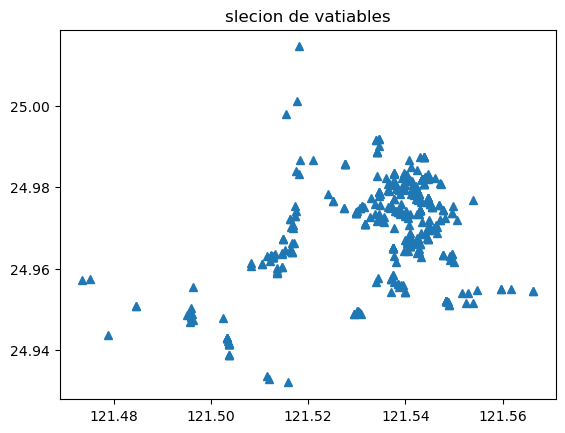

In [71]:
plt.plot(data1.longitude, data1.latitude, '^')
plt.title('slecion de vatiables')

## método 2 para escoger que variables escoger 

Cross Validation CV, divide el conjunto de trian en 4 y lugo cálcula la métrica de $R^2$ y cual es el desempeño del modelo 

El modelo se ajusta en datos nuevos y cálcula el promedio  de los entrenamientos



In [72]:
from sklearn.feature_selection import RFECV

model =XGBRegressor()

selector=RFECV(model, step=3, min_features_to_select=3, cv=4) 
# solo se va qudar con 3 variables   el q mejor resultados tenga
selector.fit(X,Y)

print(X.columns)
print('Cuál es la varialbe de mayor ínteres ',selector.ranking_)
print('Todas las variables pertenecen al mismo grupo son del mismso interes')


Index(['house age', ' distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude', 'year',
       'month', 'day'],
      dtype='object')
Cuál es la varialbe de mayor ínteres  [1 1 1 1 1 1 1 1]
Todas las variables pertenecen al mismo grupo son del mismso interes


In [74]:
data3=data1.drop(['longitude', 'year', 'day'], axis=1)

In [75]:
data3.shape

(413, 6)

In [76]:
X3=data3.drop('house price of unit area', axis=1)
Y3=data3['house price of unit area']

In [77]:
xtrain, xtest, ytrain, ytest=train_test_split(X3,Y3, random_state=1)

In [78]:
model3= XGBRegressor(gru_id=0)
model3.fit(xtrain, ytrain)


[13:57:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "gru_id" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, gru_id=0,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [79]:
pred_train3 =model3.predict(xtrain)
predicion3=model3.predict(xtest)


In [80]:
print(r2_score(ytrain, pred_train))
print(r2_score(ytest,predicion ))

0.8866766297596369
0.7925611260936312


In [81]:
print(mean_squared_error(ytrain, pred_train))
print(mean_squared_error(ytest,predicion ))

19.213694486724307
35.36922077836396
